In [3]:
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 32.5 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [3]:
jan_df = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')

In [66]:
feb_df = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')

# Functions

In [4]:
# preprocessing data
def preprocessing(df):
    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
    df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)
    
    #set to str otherwise cannot do one hot encoding
    # or use pd.categorical?
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    # remove outliers
    df = df[(df['duration'] >= 1)& (df['duration'] <= 60)]
    
    return df  

In [5]:
# Creating sparse matrix - features
def ohe(df):
    categorical = ['PULocationID', 'DOLocationID']
    feats_df = df[categorical]
    
    feats_dicts = feats_df.to_dict(orient='records')
    return feats_dicts

# Preprocessing

In [6]:
print(f"total rows: {len(jan_df)}")

total rows: 2463931


In [7]:
jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

# Home work 1

In [8]:
# Read the data for January. How many columns are there?
len(jan_df.columns)

19

In [11]:
# Now let's compute the duration variable. It should contain the duration of a ride in minutes. 
# What's the standard deviation of the trips duration in January?
duration = jan_df['tpep_dropoff_datetime'] - jan_df['tpep_pickup_datetime']
duration = duration.apply(lambda td: td.total_seconds() / 60)

round(duration.std(),2)

46.45

In [19]:
# Fraction of the records left after dropping the outliers
round(len(duration[(duration >= 1) & (duration <= 60)])/len(jan_df),3)

0.983

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer
* Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

In [67]:
jan_df = preprocessing(jan_df)
jan_feats = ohe(jan_df)

In [68]:
#  ohe transformer
dv = DictVectorizer()
x_train = dv.fit_transform(jan_feats)

In [69]:
print(f"matrix with {x_train.shape[1]} columns")

matrix with 515 columns


In [47]:
# convert the feature matrix to dataframe
# pd.DataFrame.sparse.from_spmatrix(x_train)

# convert to array

x_train_array = x_train.toarray()

,0,1,2,3,4,5,6,7,8,9,...,505,506,507,508,509,510,511,512,513,514
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2421436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2421437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2421438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters

Calculate the RMSE of the model on the training data

What's the RMSE on train?

In [70]:
# target
y = jan_df['duration']
lr = LinearRegression()

model_lr = lr.fit(x_train, y)

In [71]:
y_pred = model_lr.predict(x_train)

In [72]:
y_pred[:10]

array([ 9.45448527, 16.13420781, 13.81761527, 10.43550017, 11.08656746,
       19.63635042, 14.84038648, 14.62907227, 10.58728576,  9.90504143])

In [73]:
mean_squared_error(y, y_pred, squared=False)

6.986190836477672

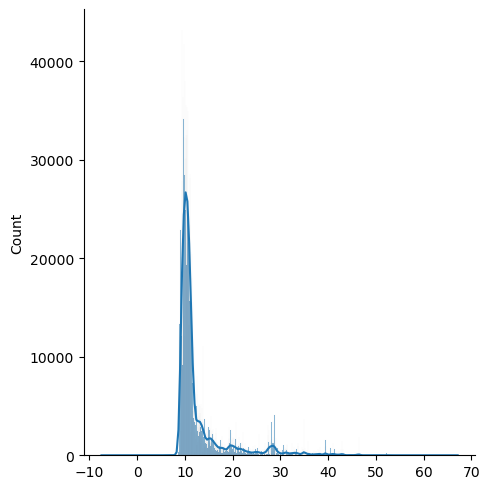

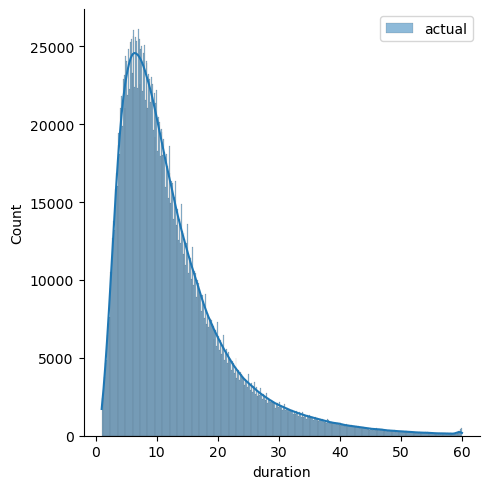

In [54]:
#figure(figsize=(8, 6))
sns.displot(y_pred, label='prediction',kde=True)
sns.displot(y, label='actual',kde=True)
plt.legend()

In [74]:
# Validation set
feb_df = preprocessing(feb_df)
feb_feats = ohe(feb_df)

In [75]:
# one hot encode
feb_validation = dv.transform(feb_feats)

In [76]:
feb_y_pred = model_lr.predict(feb_matrix)

In [77]:
mean_squared_error(feb_df['duration'], feb_y_pred, squared=False)

7.78640879016696